# Task A

In [1]:
import pandas as pd
margin = pd.read_csv('Margin.csv')
margin.head()

,Number (x1),Nearest (x2),Office (x3),Enrolment (x4),Income (x5),Distance (x6),Margin (y)
0,3203,4.2,54.9,8.0,40,4.3,55.5
1,2810,2.8,49.6,17.5,38,23.0,33.8
2,2890,2.4,25.4,20.0,38,4.2,49.0
3,3422,3.3,43.4,15.5,41,19.4,31.9
4,2687,0.9,67.8,15.5,46,11.0,57.4


In [2]:
x = margin.iloc[:, :-1]
y = margin.loc[:, 'Margin (y)']

In [3]:
import numpy as np
x = np.array(x)
y = np.array(y).reshape(-1,1)
x = x/np.max(x, axis = 0)
y = y/np.max(y, axis = 0)

In [4]:
input_layer_size = 6
hidden_layer_size = 12
output_layer_size = 1
np.random.seed(0)
W1 = np.random.randn(input_layer_size, hidden_layer_size)
W2 = np.random.randn(hidden_layer_size, output_layer_size)
alpha = 0.0001

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoid_derivative(z):
    return np.exp(-z)/(1+np.exp(-z))**2

In [6]:
list1 = []
for i in range(0, 1):
    z2 = np.dot(x, W1)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W2)
    predict = sigmoid(z3)
    loss = 0.5 * sum((predict - y)**2)
    list1.append(loss)
    sigma3 = np.multiply((predict - y), sigmoid_derivative(z3))
    W2_derivative = np.dot(a2.T, sigma3)
    sigma2 = np.multiply(sigma3.dot(W2.T), sigmoid_derivative(z2))
    W1_derivative = np.dot(x.T, sigma2)
    W1 = W1 - alpha * W1_derivative
    W2 = W2 - alpha * W2_derivative

In [7]:
loss.round(4)

array([15.2959])

In [8]:
W1.round(4)

array([[ 1.7641,  0.4   ,  0.9788,  2.2408,  1.8675, -0.9773,  0.9501,
        -0.1514, -0.1033,  0.4107,  0.1441,  1.4541],
       [ 0.7611,  0.1215,  0.4439,  0.3336,  1.494 , -0.2052,  0.313 ,
        -0.8541, -2.553 ,  0.6537,  0.8645, -0.7423],
       [ 2.2698, -1.4545,  0.0458, -0.1873,  1.5327,  1.4693,  0.1549,
         0.3782, -0.8878, -1.9807, -0.3479,  0.1562],
       [ 1.2303,  1.2022, -0.3873, -0.3024, -1.0486, -1.42  , -1.7063,
         1.9508, -0.5097, -0.438 , -1.2527,  0.7773],
       [-1.6138, -0.2129, -0.8954,  0.3868, -0.5109, -1.1807, -0.0282,
         0.4283,  0.0665,  0.3026, -0.6343, -0.3629],
       [-0.6724, -0.3597, -0.8131, -1.7263,  0.1774, -0.4018, -1.6302,
         0.4628, -0.9073,  0.052 ,  0.7291,  0.1289]])

In [9]:
W2.round(4)

array([[ 1.1401],
       [-1.2344],
       [ 0.4027],
       [-0.6842],
       [-0.8701],
       [-0.5787],
       [-0.3113],
       [ 0.0568],
       [-1.1651],
       [ 0.9011],
       [ 0.466 ],
       [-1.5357]])

In [10]:
W1_derivative.round(4)

array([[-0.6383,  1.7083, -0.5495,  0.7705,  0.5017,  0.3706,  0.354 ,
        -0.0517,  0.4256, -1.1752, -0.6106,  1.7554],
       [-0.4962,  1.3918, -0.449 ,  0.6292,  0.3801,  0.3011,  0.2878,
        -0.0433,  0.2895, -0.9652, -0.504 ,  1.4707],
       [-0.4989,  1.4313, -0.461 ,  0.6623,  0.4073,  0.3344,  0.2969,
        -0.0428,  0.3447, -0.9616, -0.5106,  1.4883],
       [-0.5451,  1.5023, -0.479 ,  0.6908,  0.4617,  0.3147,  0.2996,
        -0.043 ,  0.3641, -1.0227, -0.5276,  1.5301],
       [-0.7411,  1.9456, -0.6233,  0.8857,  0.5835,  0.4258,  0.402 ,
        -0.0585,  0.4906, -1.3341, -0.6927,  2.0162],
       [-0.4603,  1.1835, -0.3757,  0.5773,  0.3474,  0.2515,  0.2296,
        -0.0347,  0.2741, -0.812 , -0.4297,  1.2176]])

In [11]:
W2_derivative.round(4)

array([[-7.2726],
       [-3.8863],
       [-3.3535],
       [-5.8247],
       [-7.2394],
       [-1.0948],
       [-2.4187],
       [-6.5208],
       [-0.5856],
       [-3.1284],
       [-3.0764],
       [-5.8807]])

In [12]:
list2 = []
for i in range(0, 10000):
    z2 = np.dot(x, W1)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W2)
    predict = sigmoid(z3)
    loss = 0.5 * sum((predict - y)**2)
    list2.append(loss)
    sigma3 = np.multiply((predict - y), sigmoid_derivative(z3))
    W2_derivative = np.dot(a2.T, sigma3)
    sigma2 = np.multiply(sigma3.dot(W2.T), sigmoid_derivative(z2))
    W1_derivative = np.dot(x.T, sigma2)
    W1 = W1 - alpha * W1_derivative
    W2 = W2 - alpha * W2_derivative

In [13]:
loss.round(4)

array([0.7082])

In [14]:
W1.round(4)

array([[ 1.7783,  0.3338,  1.0084,  2.2073,  1.8442, -1.0022,  0.9367,
        -0.1512, -0.1247,  0.4671,  0.1716,  1.3685],
       [ 0.7748,  0.059 ,  0.4734,  0.3057,  1.4757, -0.2268,  0.3008,
        -0.8492, -2.569 ,  0.7088,  0.8928, -0.8216],
       [ 2.3255, -1.5803,  0.1144, -0.2352,  1.5001,  1.4328,  0.1345,
         0.4015, -0.9271, -1.8627, -0.281 ,  0.0065],
       [ 1.2623,  1.1039, -0.3376, -0.3424, -1.0776, -1.4486, -1.7225,
         1.962 , -0.5388, -0.3502, -1.2064,  0.6616],
       [-1.5681, -0.3348, -0.8332,  0.3361, -0.5466, -1.2188, -0.0495,
         0.4438,  0.0271,  0.4143, -0.5743, -0.511 ],
       [-0.6629, -0.3993, -0.7962, -1.7494,  0.1623, -0.4177, -1.6382,
         0.4614, -0.9219,  0.0849,  0.7462,  0.0765]])

In [15]:
W2.round(4)

array([[ 1.661 ],
       [-1.0537],
       [ 0.6137],
       [-0.3236],
       [-0.3933],
       [-0.4736],
       [-0.1557],
       [ 0.5362],
       [-1.1226],
       [ 1.0203],
       [ 0.6135],
       [-1.1802]])

In [16]:
import matplotlib.pyplot as plt
plt.plot(list2)
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.show()
plt.plot(y, 'g', label = 'observed target values')
plt.plot(predict, 'r', label = 'predict target values')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Task B

In [17]:
import numpy as np
numIterations= 100

V= np.matrix([[5,2,3,1,2],
             [3,2,6,1,6],
             [3,2,1,5,7],
             [1,6,1,6,7],
             [8,6,3,2,5],
             [6,1,5,1,5]])
[d, N]= np.shape(V)
r= 2
np.random.seed(0)
W_init= np.abs(np.random.randn(d, r)) 
H_init= np.abs(np.random.randn(r, N))

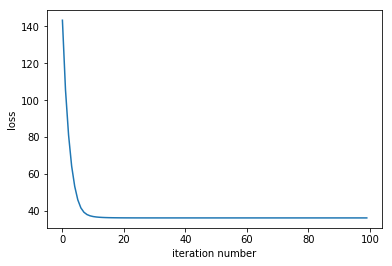

In [18]:
LIST = []
for i in range(0, numIterations):
    H_kj1 = np.dot(W_init.T, V)
    H_kj2 = np.dot(np.dot(W_init.T, W_init), H_init)
    H_kj0 = H_kj1/H_kj2
    H_kj = np.multiply(H_init, H_kj0)
    W_ij1 = np.dot(V, H_kj.T)
    W_ij2 = np.dot(np.dot(W_init, H_kj), H_kj.T)
    W_ij0 = W_ij1/W_ij2
    W_ik = np.multiply(W_init, W_ij0)
    W_init = W_ik
    H_init = H_kj
    distance = V - np.dot(W_ik, H_kj)
    distance_loss = np.sum(np.square(distance))
    LIST.append(distance_loss)

plt.plot(LIST)
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.show()

In [19]:
print(W_init.round(4))

[[0.1009 1.7501]
 [0.6411 1.9692]
 [1.8702 0.6716]
 [2.6536 0.0921]
 [0.9483 2.4806]
 [0.2182 2.4718]]


In [20]:
print(H_init.round(4))

[[0.4257 1.8804 0.1424 2.3248 2.7586]
 [2.4898 0.7997 1.8715 0.0766 1.492 ]]


In [21]:
np.dot(W_init, H_init).round(4)

array([[4.4005, 1.5894, 3.2897, 0.3687, 2.8896],
       [5.1759, 2.7803, 3.7766, 1.6413, 4.7066],
       [2.4682, 4.0539, 1.5232, 4.3994, 6.1612],
       [1.3591, 5.0635, 0.5504, 6.1762, 7.4576],
       [6.5799, 3.7669, 4.7774, 2.3947, 6.317 ],
       [6.2472, 2.387 , 4.657 , 0.6966, 4.2898]])

# Task C

In [22]:
import warnings 
warnings.filterwarnings('ignore')

In [23]:

# Import appropriate packages for assignment
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,KFold
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [24]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [25]:
pd.set_option('max_colwidth',500)
pd.set_option('display.width',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

In [26]:
train = pd.read_csv("train.csv", keep_default_na=False,na_values=[''])
test = pd.read_csv("test.csv", keep_default_na=False,na_values=[''])
train.head()

,Train_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,80,RL,76.0,9880,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522,Unf,0,574,1096,GasA,TA,Y,SBrkr,1118,0,0,1118,1.0,0.0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1.0,358.0,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NA,0,7,2008,WD,Normal,171000
1,2,20,RL,NaN,21000,Pave,NA,Reg,Bnk,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,184.0,TA,Gd,CBlock,Gd,TA,Mn,ALQ,35,Rec,869,905,1809,GasA,TA,Y,SBrkr,2259,0,0,2259,1.0,0.0,2,0,3,1,Gd,7,Typ,2,Gd,Basment,1953.0,Unf,2.0,450.0,TA,TA,Y,166,120,192,0,0,0,NA,MnPrv,NA,0,10,2007,COD,Abnorml,217000
2,3,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,Partial,160000
3,4,20,FV,100.0,11824,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1685,1685,GasA,Ex,Y,SBrkr,1685,0,0,1685,0.0,0.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2006.0,Fin,3.0,658.0,TA,TA,Y,112,63,0,0,0,0,NA,NA,NA,0,4,2007,WD,Normal,253000
4,5,20,RL,72.0,10011,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1996,Gable,CompShg,HdBoard,HdBoard,BrkFace,64.0,TA,TA,CBlock,TA,TA,No,BLQ,360,Unf,0,710,1070,GasA,TA,Y,SBrkr,1236,0,0,1236,0.0,1.0,1,0,2,1,Gd,6,Min1,1,Fa,Attchd,1957.0,Unf,1.0,447.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2006,WD,Normal,134450


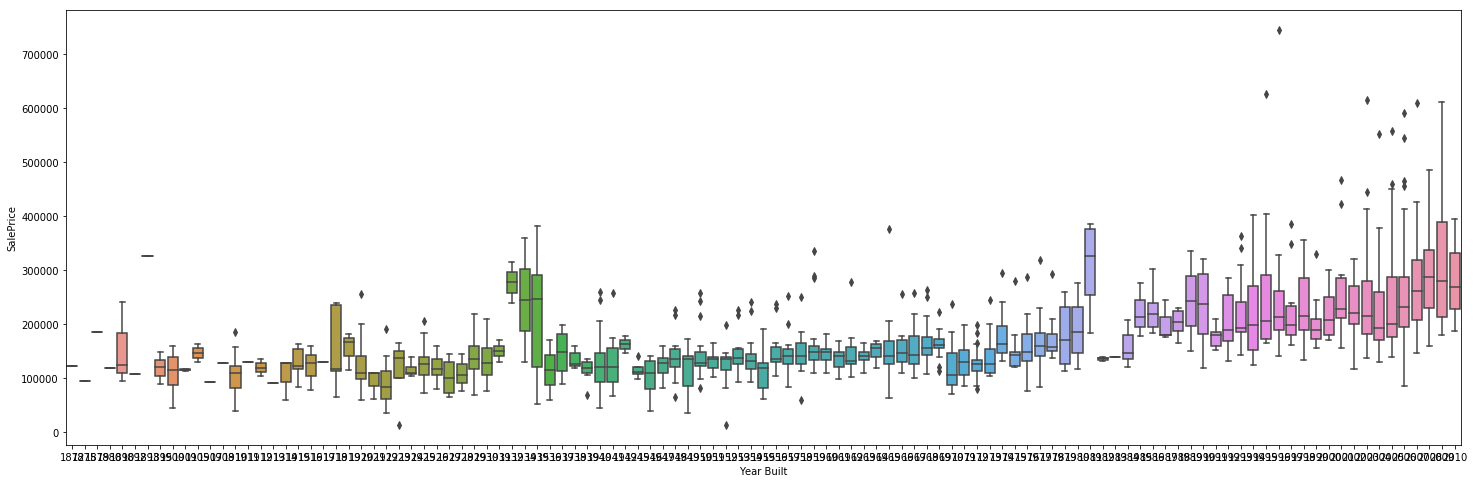

In [27]:
plt.figure(figsize=(25,8))
sns.boxplot(train['Year Built'], train.SalePrice)

(0, 800000)

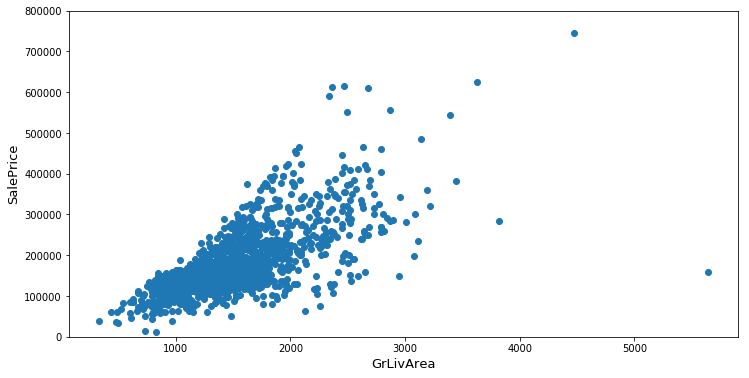

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(x=train['Gr Liv Area'], y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [29]:
train.drop(train[(train['Gr Liv Area']>4000)&(train["SalePrice"]<300000)].index,inplace=True)


In [30]:
full=pd.concat([train,test], ignore_index=True)

In [31]:
full.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Screen Porch,Street,Test_ID,TotRms AbvGrd,Total Bsmt SF,Train_ID,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,1118,0,0,NA,3,1Fam,TA,Av,1.0,0.0,TA,574.0,522.0,0.0,ALQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,GdPrv,Po,1,CBlock,1,Typ,358.0,1.0,TA,Fin,TA,Attchd,1977.0,1118,0,GasA,TA,SLvl,1,TA,Lvl,Gtl,9880,Inside,76.0,Reg,0,80,RL,0.0,None,NA,0,7,Mitchel,0,6,6,Y,576,Gd,CompShg,Gable,Normal,WD,171000.0,0,Pave,NaN,6,1096.0,1.0,AllPub,203,1977,1977,2008
1,2259,0,0,NA,3,1Fam,TA,Mn,1.0,0.0,Gd,905.0,35.0,869.0,ALQ,Rec,Y,Norm,Norm,SBrkr,192,Gd,TA,Wd Sdng,Wd Sdng,MnPrv,Gd,2,CBlock,2,Typ,450.0,2.0,TA,Unf,TA,Basment,1953.0,2259,0,GasA,TA,1Story,1,Gd,Bnk,Gtl,21000,Corner,NaN,Reg,0,20,RL,184.0,BrkFace,NA,0,10,Crawfor,120,5,6,Y,0,NA,CompShg,Hip,Abnorml,COD,217000.0,0,Pave,NaN,7,1809.0,2.0,AllPub,166,1953,1953,2007
2,1685,0,0,NA,2,1Fam,TA,Av,0.0,0.0,Gd,1685.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,2,Typ,658.0,3.0,TA,Fin,TA,Attchd,2006.0,1685,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,11824,Corner,100.0,IR1,0,20,FV,298.0,BrkFace,NA,0,4,Somerst,63,5,8,Y,0,NA,CompShg,Gable,Normal,WD,253000.0,0,Pave,NaN,5,1685.0,4.0,AllPub,112,2006,2006,2007
3,1236,0,0,NA,2,1Fam,TA,No,0.0,1.0,TA,710.0,360.0,0.0,BLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,MnPrv,Fa,1,CBlock,1,Min1,447.0,1.0,TA,Unf,TA,Attchd,1957.0,1236,0,GasA,TA,1Story,1,Gd,Lvl,Gtl,10011,Inside,72.0,IR1,0,20,RL,64.0,BrkFace,NA,0,5,NAmes,0,6,5,Y,0,NA,CompShg,Gable,Normal,WD,134450.0,0,Pave,NaN,6,1070.0,5.0,AllPub,0,1957,1996,2006
4,1057,0,0,NA,3,1Fam,TA,No,0.0,0.0,TA,640.0,417.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,NA,0,CBlock,1,Typ,576.0,2.0,TA,Fin,TA,Detchd,1977.0,1057,0,GasA,TA,1Story,1,TA,Lvl,Gtl,7420,Inside,70.0,Reg,0,20,RL,0.0,None,NA,0,4,Sawyer,0,5,5,Y,0,NA,CompShg,Hip,Normal,WD,132000.0,0,Pave,NaN,6,1057.0,6.0,AllPub,0,1962,1962,2007


In [32]:
full.shape

(2779, 82)

In [33]:
full.drop(['Test_ID','Train_ID'],axis=1,inplace=True)

In [34]:
full.shape

(2779, 80)

In [35]:
full.columns

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr', 'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air', 'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch', 'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence', 'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional', 'Garage Area', 'Garage Cars',
       'Garage Cond', 'Garage Finish', 'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area', 'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Kitchen AbvGr', 'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Area', 'Lot Config', 'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF', 'MS SubClass', 'MS Zoning', 'Mas Vnr Area', 'Mas Vnr Type', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Neighborhood', 'Open Porch SF', 'Overall Cond', 'Overall Qual', 'Paved Drive', 'Pool Area', 'Pool QC',
       'R

In [36]:
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

SalePrice         1382
Lot Frontage       470
Garage Yr Blt      154
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Exposure        4
Garage Finish        2
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin Type 2       2
Total Bsmt SF        1
BsmtFin SF 1         1
Bsmt Qual            1
Bsmt Unf SF          1
Electrical           1
BsmtFin SF 2         1
BsmtFin Type 1       1
Garage Area          1
Garage Cars          1
Garage Cond          1
Garage Qual          1
Bsmt Cond            1
dtype: int64

In [37]:
full.groupby(['Bldg Type'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                    mean    median count
Bldg Type                               
1Fam       183939.846684  163000.0  1161
2fmCon     125273.000000  118000.0    25
Duplex     135916.711111  127500.0    45
Twnhs      136102.592593  132000.0    54
TwnhsE     192886.848214  181000.0   112

In [38]:
full["LotAreaCut"] = pd.qcut(full['Lot Area'],10)

In [39]:
full.groupby(['LotAreaCut'])[['Lot Frontage']].agg(['mean','median','count'])

Lot Frontage             
                            mean median count
LotAreaCut                                   
(1299.999, 4734.4]     35.144068   34.0   236
(4734.4, 7000.0]       55.168627   52.0   255
(7000.0, 7943.8]       63.067797   62.0   236
(7943.8, 8738.4]       66.955285   65.0   246
(8738.4, 9452.0]       69.709957   70.0   231
(9452.0, 10163.0]      73.831276   75.0   243
(10163.0, 11016.2]     73.974790   75.0   238
(11016.2, 12225.2]     83.651376   83.5   218
(12225.2, 14314.8]     85.046512   85.0   215
(14314.8, 215245.0]    93.743455   90.0   191

In [40]:
full['Lot Frontage']=full.groupby(['LotAreaCut','Neighborhood'])['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [41]:
# Since some combinations of LotArea and Neighborhood are not available, so we just LotAreaCut alone.
full['Lot Frontage']=full.groupby(['LotAreaCut'])['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [42]:
cols=["Mas Vnr Area", "Bsmt Unf SF", "Total Bsmt SF", "Garage Cars", "BsmtFin SF 2", "BsmtFin SF 1", "Garage Area"]
for col in cols:
    full[col].fillna(0, inplace=True)

In [43]:
cols1 = ["Pool QC" , "Misc Feature", "Alley", "Fence", "Fireplace Qu", "Garage Qual", "Garage Cond", "Garage Finish", "Garage Yr Blt", "Garage Type", "Bsmt Exposure", "Bsmt Cond", "Bsmt Qual", "BsmtFin Type 2", "BsmtFin Type 1", "Mas Vnr Type"]
for col in cols1:
    full[col].fillna("NA", inplace=True)
    


In [44]:
# fill in with mode
cols2 = ["MS Zoning", "Bsmt Full Bath", "Bsmt Half Bath", "Utilities", "Functional", "Electrical", "Kitchen Qual", "Sale Type","Exterior 1st", "Exterior 2nd"]
for col in cols2:
    full[col].fillna(full[col].mode()[0], inplace=True)

In [45]:
full.isnull().sum()[full.isnull().sum()>0]

SalePrice    1382
dtype: int64

In [46]:
NumStr = ["MS SubClass","Bsmt Full Bath","Bsmt Half Bath","Half Bath","Bedroom AbvGr","Kitchen AbvGr","Mo Sold","Yr Sold","Year Built","Year Remod/Add","Low Qual Fin SF","Garage Yr Blt"]
for col in NumStr:
    full[col]=full[col].astype(str)

In [47]:
full.groupby(['MS SubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                      mean    median count
MS SubClass                               
120          207446.134021  192000.0    97
150          148400.000000  148400.0     1
160          135480.477612  130000.0    67
180          102600.000000   92000.0     5
190          127353.000000  119600.0    25
20           190122.587209  159000.0   516
30            95953.115942   99900.0    69
40           169750.000000  169750.0     2
45           111042.857143  113000.0    14
50           134295.883212  128500.0   137
60           237979.803774  211000.0   265
70           157845.133333  144000.0    60
75           163583.333333  138000.0    12
80           163419.642857  165000.0    56
85           151063.461538  149450.0    26
90           135916.711111  127500.0    45

In [48]:
full['MS Zoning'].value_counts()

RL         2153
RM          435
FV          135
RH           27
C (all)      24
I (all)       2
A (agr)       2
RL            1
Name: MS Zoning, dtype: int64

In [49]:
full['MS Zoning'].replace('RL ', 'RL', inplace = True)

In [50]:
full['Neighborhood'].value_counts()

NAmes      418
CollgCr    253
OldTown    229
Edwards    180
Somerst    174
NridgHt    158
Gilbert    156
Sawyer     144
NWAmes     126
SawyerW    118
Mitchel    109
BrkSide     97
Crawfor     93
IDOTRR      87
Timber      70
NoRidge     69
StoneBr     51
SWISU       46
ClearCr     43
MeadowV     35
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     22
Blueste      8
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [51]:
def map_values():
    full["oMSSubClass"] = full['MS SubClass'].map({'180':1, 
                                        '30':1, '45':2, 
                                        '190':2, '50':3, '90':3, 
                                        '85':4, '40':5, '160':3, 
                                        '70':4, '20':5, '75':4, '80':5, '150':4,
                                        '120': 6, '60':6})
    full["oMSZoning"] = full['MS Zoning'].map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4,'A (agr)':5,'I (all)':6})
    
    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':4, 'BrkSide':4,
                                               'Sawyer':5, 'Blueste':4, 'SWISU':5, 'NAmes':6,
                                               'NPkVill':6, 'Mitchel':7,
                                               'SawyerW':8, 'Gilbert':8, 'NWAmes':8,
                                               'Greens':9, 'GrnHill':12,
                                               'Blmngtn':8, 'CollgCr':9, 'ClearCr':8, 'Crawfor':10,
                                               'Veenker':12, 'Somerst':11, 'Timber':13,
                                               'StoneBr':14,'Landmrk':0,
                                               'NoRidge':15, 'NridgHt':16})
    
    full["oCondition1"] = full['Condition 1'].map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':4, 'RRAn':5,
                                           'PosN':6, 'RRNe':3,
                                           'PosA':8 ,'RRNn':7})
    
    full["oBldgType"] = full['Bldg Type'].map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    full["oHouseStyle"] = full['House Style'].map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    full["oExterior1st"] = full['Exterior 1st'].map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7,
                                             'PreCast':8})
    
    full["oMasVnrType"] = full['Mas Vnr Type'].map({'BrkCmn':1, 'NA':1, 'BrkFace':2, 'Stone':3,'None':1})
    
    full["oExterQual"] = full['Exter Qual'].map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFoundation"] = full.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    full["oBsmtQual"] = full['Bsmt Qual'].map({'Fa':2, 'NA':0, 'TA':3, 'Gd':4, 'Ex':5,'Po':1})
    
    full["oBsmtExposure"] = full['Bsmt Exposure'].map({'NA':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    full["oHeatingQC"] = full['Heating QC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oKitchenQual"] = full['Kitchen Qual'].map({'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3, 'Sal':4})
    
    full["oFireplaceQu"] = full['Fireplace Qu'].map({'NA':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oGarageType"] = full['Garage Type'].map({'CarPort':1, 'NA':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    full["oGarageFinish"] = full['Garage Finish'].map({'NA':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    full["oPavedDrive"] = full['Paved Drive'].map({'N':1, 'P':2, 'Y':3})
    
    full["oSaleType"] = full['Sale Type'].map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD ':1,
                                               'CWD':2, 'Con':3, 'New':3,'VWD':4})
    
    full["oSaleCondition"] = full['Sale Condition'].map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "Done!"

In [52]:
map_values()

'Done!'

In [53]:
# drop two unwanted columns
full.drop("LotAreaCut",axis=1,inplace=True)
full.drop(['SalePrice'],axis=1,inplace=True)

In [54]:
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        lab=LabelEncoder()
        X["Year Built"] = lab.fit_transform(X["Year Built"])
        X["Year Remod/Add"] = lab.fit_transform(X["Year Remod/Add"])
        X["Garage Yr Blt"] = lab.fit_transform(X["Garage Yr Blt"])
        return X

In [55]:
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [56]:
# build pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [57]:
# save the original data for later use
full2 = full.copy()

In [58]:
data_pipe = pipe.fit_transform(full2)

In [59]:
data_pipe.shape

(2779, 421)

In [60]:
data_pipe.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Lot Area,Lot Frontage,Mas Vnr Area,Misc Val,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,oMSSubClass,oMSZoning,oNeighborhood,oCondition1,oBldgType,oHouseStyle,oExterior1st,oMasVnrType,oExterQual,oFoundation,oBsmtQual,oBsmtExposure,oHeating,oHeatingQC,oKitchenQual,oFunctional,oFireplaceQu,oGarageType,oGarageFinish,oPavedDrive,oSaleType,oSaleCondition,Alley_Grvl,Alley_NA,Alley_Pave,Bedroom AbvGr_0,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_NA,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_NA,Bsmt Exposure_No,Bsmt Full Bath_0.0,Bsmt Full Bath_1.0,Bsmt Full Bath_2.0,Bsmt Full Bath_3.0,Bsmt Half Bath_0.0,Bsmt Half Bath_1.0,Bsmt Half Bath_2.0,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_NA,Bsmt Qual_Po,Bsmt Qual_TA,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_NA,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_NA,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Central Air_N,Central Air_Y,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_NA,Fireplace Qu_Po,Fireplace Qu_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_NA,Garage Cond_Po,Garage Cond_TA,Garage Finish_Fin,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_NA,Garage Qual_Po,Garage Qual_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Half Bath_0,Half Bath_1,Half Bath_2,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Kitchen AbvGr_0,Kitchen AbvGr_1,Kitchen AbvGr_2,Kitchen AbvGr_3,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Land

In [61]:
data_pipe.isnull().sum()

1st Flr SF                0
2nd Flr SF                0
3Ssn Porch                0
Bsmt Unf SF               0
BsmtFin SF 1              0
BsmtFin SF 2              0
Enclosed Porch            0
Fireplaces                0
Full Bath                 0
Garage Area               0
Garage Cars               0
Garage Yr Blt             0
Gr Liv Area               0
Lot Area                  0
Lot Frontage              0
Mas Vnr Area              0
Misc Val                  0
Open Porch SF             0
Overall Cond              0
Overall Qual              0
Pool Area                 0
Screen Porch              0
TotRms AbvGrd             0
Total Bsmt SF             0
Wood Deck SF              0
Year Built                0
Year Remod/Add            0
oMSSubClass               0
oMSZoning                 0
oNeighborhood             0
oCondition1               0
oBldgType                 0
oHouseStyle               0
oExterior1st              0
oMasVnrType               0
oExterQual          

In [62]:
scaler = RobustScaler()

In [63]:
n_train=train.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

# EDA

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 180211.2427 and sigma = 81693.5834



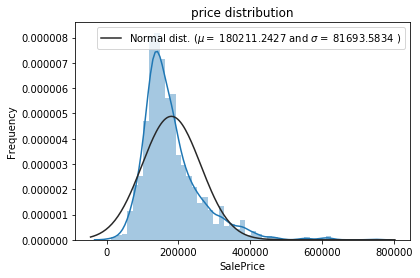

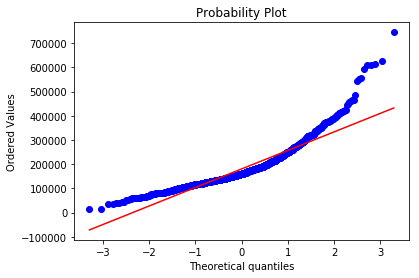

In [64]:
#target value
sns.distplot(y, fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.4f} and sigma = {:.4f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.4f} and $\sigma=$ {:.4f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

In [65]:
#positive skewed, so take log
print("skewness:{:.4f}".format(y.skew()))
print("kurtosis:{:.4f}".format(y.kurt()))

skewness:1.7609
kurtosis:5.2898



 mu = 12.01 and sigma = 0.42



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


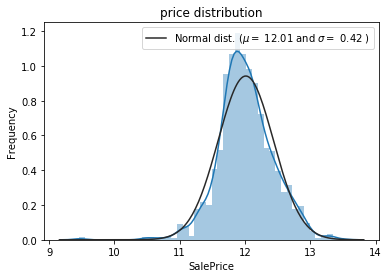

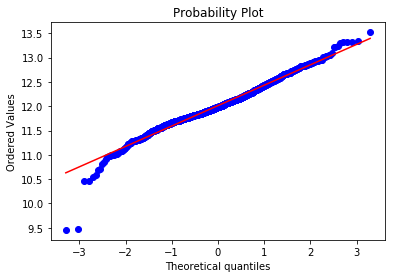

In [66]:
#target value
sns.distplot(y_log, fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_log)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_log, plot=plt)
plt.show()

In [67]:
print("skewness:{:.4f}".format(y_log.skew()))
print("kurtosis:{:.4f}".format(y_log.kurt()))

skewness:-0.1882
kurtosis:2.2095


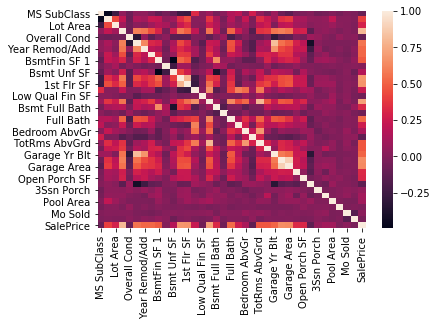

In [68]:
train_cor=train.copy()
train_cor=train_cor.drop("Train_ID",axis=1)
train_cor = train_cor.select_dtypes(exclude='object')
data_corr=train_cor.corr().round(4)
sns.heatmap(data_corr)

In [69]:
data_corr.abs().sort_values("SalePrice",ascending=False)["SalePrice"]

SalePrice          1.0000
Overall Qual       0.8030
Gr Liv Area        0.7159
Total Bsmt SF      0.6823
1st Flr SF         0.6690
Garage Cars        0.6452
Garage Area        0.6376
Year Built         0.5634
Full Bath          0.5340
Mas Vnr Area       0.5261
Year Remod/Add     0.5229
Garage Yr Blt      0.5096
BsmtFin SF 1       0.4842
Fireplaces         0.4743
TotRms AbvGrd      0.4742
Lot Frontage       0.4008
Wood Deck SF       0.3280
Bsmt Full Bath     0.3209
Open Porch SF      0.3126
Lot Area           0.2919
Half Bath          0.2619
2nd Flr SF         0.2358
Bsmt Unf SF        0.1686
Bedroom AbvGr      0.1362
Enclosed Porch     0.1314
Kitchen AbvGr      0.1211
Screen Porch       0.1107
Pool Area          0.1010
Overall Cond       0.0906
MS SubClass        0.0887
Bsmt Half Bath     0.0681
3Ssn Porch         0.0644
Low Qual Fin SF    0.0572
Yr Sold            0.0294
Mo Sold            0.0262
Misc Val           0.0193
BsmtFin SF 2       0.0026
Name: SalePrice, dtype: float64

In [70]:
new_data=pd.concat([X,y_log],axis=1)
check_cor=new_data.corr()

In [71]:
check_cor.abs().sort_values("SalePrice",ascending=False)["SalePrice"]

SalePrice                 1.000000
Neighborhood_Sawyer       0.075112
Garage Type_CarPort       0.068341
BsmtFin Type 2_BLQ        0.067410
oGarageType               0.066548
Fence_MnWw                0.064887
Low Qual Fin SF_397       0.063838
Heating_Grav              0.063262
Mo Sold_6                 0.062307
Mo Sold_11                0.059782
Roof Matl_Tar&Grv         0.059634
MS Zoning_RH              0.056208
Garage Qual_TA            0.055278
Bsmt Cond_Ex              0.053626
Roof Matl_CompShg         0.052523
Bsmt Exposure_No          0.052454
Roof Style_Shed           0.052371
Sale Type_CWD             0.052235
Bedroom AbvGr_5           0.052229
Misc Feature_Othr         0.052148
BsmtFin Type 1_BLQ        0.050269
Mo Sold_12                0.049694
Garage Type_NA            0.049676
Garage Cond_Po            0.048734
Full Bath                 0.048165
Garage Type_Attchd        0.048152
Neighborhood_MeadowV      0.047911
Garage Cond_NA            0.047271
Garage Qual_NA      

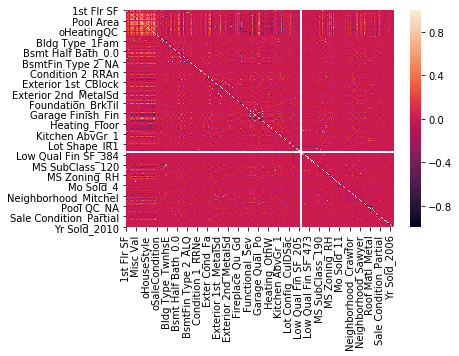

In [72]:
sns.heatmap(check_cor)

In [73]:
def get_pairs(df):
    ## Get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = train_cor.columns
    for i in range(0, train_cor.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=13):
    cal_corr = train_cor.corr().abs().unstack()
    labels_to_drop = get_pairs(train_cor)
    cal_corr = cal_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return cal_corr[0:n].round(4)
#print(check_cor.corr())
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_cor, 5))

Top Absolute Correlations
Garage Cars    Garage Area      0.8939
Year Built     Garage Yr Blt    0.8238
Overall Qual   SalePrice        0.8030
Gr Liv Area    TotRms AbvGrd    0.7962
Total Bsmt SF  1st Flr SF       0.7876
dtype: float64


Text(0.5,1,'Overall Qual ')

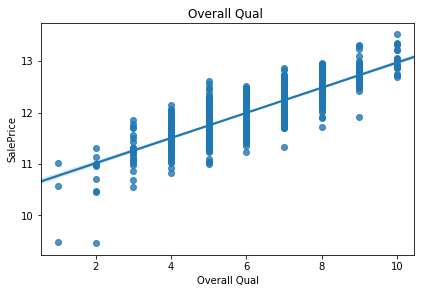

In [74]:

sns.regplot(x=train["Overall Qual"],y=y_log)
plt.tight_layout()
plt.title("Overall Qual ")

Text(0.5,1,'Gr Liv Area')

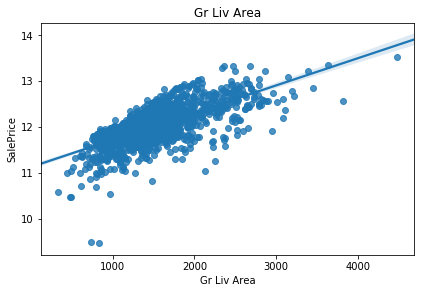

In [75]:
sns.regplot(x=train["Gr Liv Area"],y=y_log)
plt.tight_layout()
plt.title("Gr Liv Area")

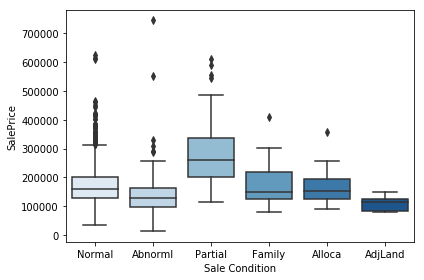

In [76]:
# data_box=pd.concat([,y_log],axis=1)
sns.boxplot(x="Sale Condition", y="SalePrice", data=train, palette='Blues')
plt.tight_layout()
plt.show()

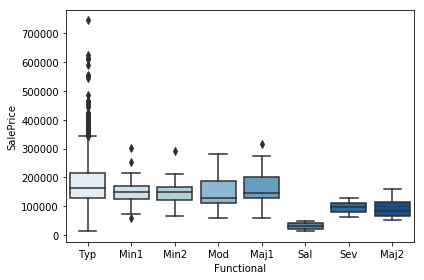

In [77]:
sns.boxplot(x="Functional", y="SalePrice", data=train, palette='Blues')
plt.tight_layout()
plt.show()

In [78]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_pipe.columns)

In [80]:
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
Overall Qual,1.234317e-01
Gr Liv Area,1.173248e-01
Year Built,8.130236e-02
1st Flr SF,5.406128e-02
Overall Cond,5.098748e-02
Total Bsmt SF,4.850834e-02
2nd Flr SF,4.623723e-02
Functional_Typ,4.425112e-02
oNeighborhood,4.351520e-02
BsmtFin SF 1,3.750113e-02


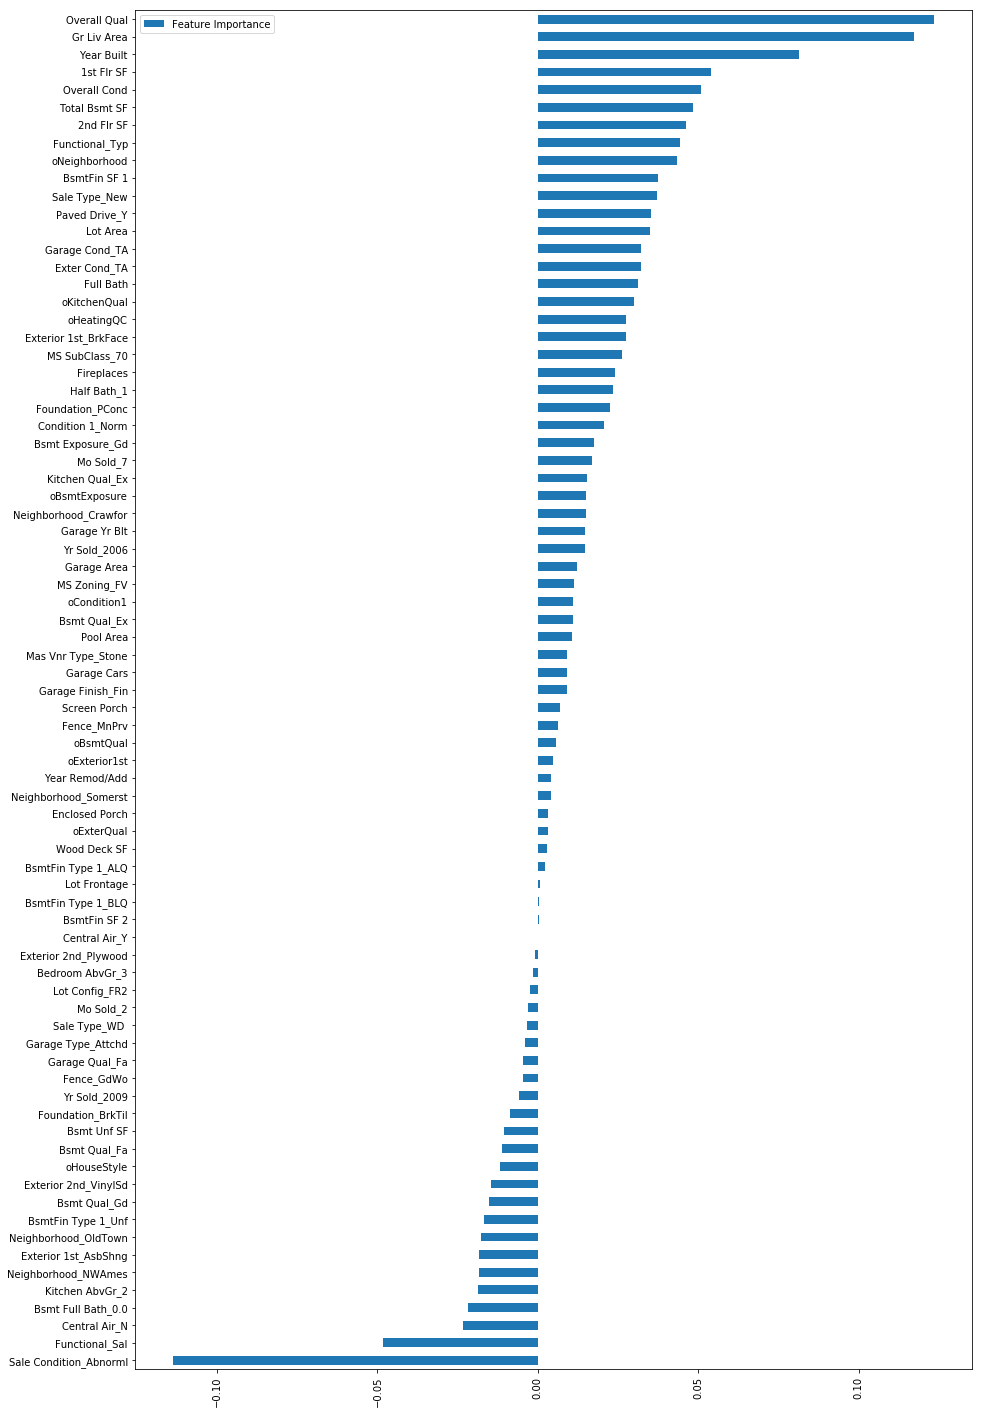

In [81]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [82]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["Total Bsmt SF"] + X["1s tFlr SF"] + X["2nd Flr SF"]   
            X["TotalArea"] = X["Total Bsmt SF"] + X["1st Flr SF"] + X["2nd Flr SF"] + X["Garage Area"]
            
        else:
            X["TotalHouse"] = X["Total Bsmt SF"] + X["1st Flr SF"] + X["2nd Flr SF"]   
            X["TotalArea"] = X["Total Bsmt SF"] + X["1st Flr SF"] + X["2nd Flr SF"] + X["Garage Area"]
            
            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["Overall Qual"]
            X["+_GrLivArea_OverallQual"] = X["Gr Liv Area"] * X["Overall Qual"]
            X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["Overall Qual"]
            X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["Year Built"]
            X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["Overall Qual"]
            X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["Year Built"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFin SF 1"] * X["Overall Qual"]
            
            X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["Overall Qual"]
            X["-_LotArea_OverallQual"] = X["Lot Area"] * X["Overall Qual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["Lot Area"]
            X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["Overall Qual"]
            
           
            X["Bsmt"] = X["BsmtFin SF 1"] + X["BsmtFin SF 2"] + X["Bsmt Unf SF"]
            X["Rooms"] = X["Full Bath"]+X["TotRms AbvGrd"]
            X["PorchArea"] = X["Open Porch SF"]+X["Enclosed Porch"]+X["3Ssn Porch"]+X["Screen Porch"]
            X["TotalPlace"] = X["Total Bsmt SF"] + X["1st Flr SF"] + X["2nd Flr SF"] + X["Garage Area"] + X["Open Porch SF"]+X["Enclosed Porch"]+X["3Ssn Porch"]+X["Screen Porch"]

    
            return X

In [83]:
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [84]:
full_pipe = pipe.fit_transform(full)

In [85]:
full_pipe.shape

(2779, 442)

In [86]:
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [87]:
pca = PCA(n_components=430)

In [88]:
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [89]:
X_scaled.shape, test_X_scaled.shape

((1397, 430), (1382, 430))

In [90]:

# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [91]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [92]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 64069075172.911560, 77877805911.9819
Ridge: 0.137661, 0.0134
Lasso: 0.133894, 0.0203
RF: 0.163479, 0.0137
GBR: 0.142342, 0.0173
SVR: 0.128480, 0.0192
LinSVR: 0.147972, 0.0150
Ela: 0.126875, 0.0153
SGD: 0.175364, 0.0147
Bay: 0.126036, 0.0158
Ker: 0.124385, 0.0166
Extra: 0.160415, 0.0202
Xgb: 0.148093, 0.0209


In [93]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [94]:
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})

{'alpha': 0.0009, 'max_iter': 10000} 0.12626071841576822
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.129097        0.003913
1  {'alpha': 0.0005, 'max_iter': 10000}         0.127990        0.003957
2  {'alpha': 0.0007, 'max_iter': 10000}         0.126695        0.004039
3  {'alpha': 0.0006, 'max_iter': 10000}         0.127194        0.003986
4  {'alpha': 0.0009, 'max_iter': 10000}         0.126261        0.004167
5  {'alpha': 0.0008, 'max_iter': 10000}         0.126388        0.004099


In [95]:
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 80} 0.12585733443927885
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.126399        0.004167
1  {'alpha': 40}         0.126248        0.004199
2  {'alpha': 45}         0.126133        0.004228
3  {'alpha': 50}         0.126046        0.004256
4  {'alpha': 55}         0.125980        0.004283
5  {'alpha': 60}         0.125932        0.004308
6  {'alpha': 65}         0.125898        0.004333
7  {'alpha': 70}         0.125875        0.004356
8  {'alpha': 80}         0.125857        0.004401
9  {'alpha': 90}         0.125868        0.004443


In [96]:
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

{'C': 12, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'} 0.12646687548092447
                                                           params  mean_test_score  std_test_score
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}         0.126469        0.005228
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}         0.126529        0.005016
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}         0.126488        0.005215
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}         0.126558        0.005021
4   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}         0.126467        0.005167
5   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}         0.126605        0.004974
6   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}         0.126510        0.005169
7   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}         0.126624        0.004981
8   {'C': 13, 'epsilon': 0.

# LASSO

n_train=train.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [98]:
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(test_X)
X_train1,X_vali, y_train1, y_vali = train_test_split(X_train_scaled, y_log, test_size=0.2, random_state=0)

In [99]:
lasso = LassoCV(cv=10)
lasso.fit(X_train1, y_train1)
lasso.alpha_

0.006297625789356491

In [100]:
from sklearn.pipeline import Pipeline

lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=10)),
])

lasso.fit(X_train1, y_train1)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

In [101]:
lasso = lasso._final_estimator # the final estimator attribute refers to the pipeline
np.sum(lasso.coef_==0.0)

367

In [102]:
y_pred=lasso.predict(X_vali)
y_pred=pd.DataFrame( y_pred)

In [103]:
y_pred.head()

,0
0,11.793598
1,11.869715
2,11.641429
3,11.311762
4,12.040188


In [104]:
rmse=np.sqrt(mean_squared_error(np.exp(y_vali), np.exp(y_pred)))
rmse

23674.898197150425

In [105]:
lasso.fit(X, y_log)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [106]:
y_pred=lasso.predict(test_X)
y_pred=np.exp(y_pred)
y_pred

array([180531.11441978,  89123.23115112, 277712.30091549, ...,
       143857.35299198, 204820.95256664, 165988.3642967 ])

In [107]:
indexes = range(1,1383)

df_save = pd.DataFrame()
df_save['Test_ID'] = indexes
df_save['SalePrice'] = y_pred
df_save.head()
df_save.to_csv('kaggle_submission_Lasso.csv', index=False)

# XGBOOST

In [108]:
X_train,X_vali, y_train, y_vali = train_test_split(X, y_log, test_size=0.2, random_state=0)

In [109]:
%%time
model1 = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': np.arange(0.01,0.1),
    'n_estimators' : [500,600,700,800,900,1000],
    'max_depth' : [2,3,4],
    'subsample' : [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
    
}
gb_search = RandomizedSearchCV(model1, tuning_parameters, iid=True, n_iter = 16, error_score='raise',cv = 10, return_train_score=False,n_jobs=4,
                              random_state = 20)
gb_search.fit(X_train, y_train)
xbst=gb_search.best_estimator_
print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.8, 'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.01} 

CPU times: user 6.6 s, sys: 344 ms, total: 6.94 s
Wall time: 5min 10s


In [110]:
gb_search.best_score_

0.8917363134149929

In [111]:
%%time
dtrain = xgb.DMatrix(X_train, y_train) # we need to convert the data to the format required by xgboost
dtest=xgb.DMatrix(test_X)
param = {
    'max_depth': 3, 
    'n_estimators': 800,
    'learning_rate': 0.01, 
    'subsample': 0.8 ,
    'silent' : 1, 
    'objective':'reg:linear',  
    'lambda':3,
    'alpha':2
    
     }
model = xgb.train(param, dtrain, num_boost_round = 1500)
cv = xgb.cv(param, dtrain, num_boost_round = 1500, nfold=10, early_stopping_rounds=50)

print(f'Selected number of boosting iterations: {cv.shape[0]}')
print(f'RMSE (CV): {cv.iloc[-1,0]:.4f}')

Selected number of boosting iterations: 1500
RMSE (CV): 0.0975
CPU times: user 1min 48s, sys: 163 ms, total: 1min 49s
Wall time: 1min 49s


In [112]:

rmse=np.sqrt(mean_squared_error(np.exp(y_train), np.exp(model.predict(dtrain))))
rmse

19222.035892817097

In [113]:
y_pred_end = model.predict(dtest)
y_pred_end = np.exp(y_pred_end)
y_pred_end

array([165826.88,  80798.69, 306936.62, ..., 153636.06, 195682.36,
       152860.44], dtype=float32)

In [114]:
indexes = range(1,1383)

df_save = pd.DataFrame()
df_save['Test_ID'] = indexes
df_save['SalePrice'] = y_pred_end
df_save.head()

,Test_ID,SalePrice
0,1,165826.875000
1,2,80798.687500
2,3,306936.625000
3,4,89424.476562
4,5,230607.546875


In [115]:
df_save.to_csv('kaggle_submission_xgboost.csv', index=False)

# BOOSTING

In [116]:
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

gb = GradientBoostingRegressor(learning_rate= 0.05, max_depth = 5, n_estimators= 750, subsample = 0.8)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=750, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

In [117]:
%%time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = GradientBoostingRegressor()

tuning_parameters = {
    'learning_rate': np.arange(0.01,0.1),
    'n_estimators' : [400,450,500,550,600,650,700,750,800],
    'max_depth' : [2,3],
    'subsample' : [0.2,0.3,0.4,0.5]
}

# Using GridSearchCV would be too slow. Increase the number of iterations to explore more hyperparameter combinations.
gbr = RandomizedSearchCV(model, tuning_parameters, n_iter = 20,cv = 10,return_train_score=False, n_jobs=4)
gbr.fit(X_train, y_train)

print('Best parameters found by randomised search:', gbr.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.4, 'n_estimators': 750, 'max_depth': 3, 'learning_rate': 0.01} 

CPU times: user 7.25 s, sys: 363 ms, total: 7.61 s
Wall time: 4min 32s


In [118]:
gbr.best_score_

0.8992093640262795

In [119]:
gbr

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=4,
          param_distributions={'learning_rate': array([0.01]), 'n_estimators': [400, 450, 500, 550, 600, 650, 700, 750, 800], 'max_depth': [2, 3], 'subsample': [0.2, 0.3, 0.4, 0.5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=False, scoring=None, verbose=0)

In [120]:

gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=750, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

In [121]:
gb = GradientBoostingRegressor(learning_rate= 0.01, max_depth = 3, n_estimators= 650, subsample = 0.4)

In [122]:
gb.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=650, presort='auto', random_state=None,
             subsample=0.4, verbose=0, warm_start=False)

In [123]:
rmse=np.sqrt(mean_squared_error(np.exp(y_log), gb.predict(X)))
rmse

15222.059750700499

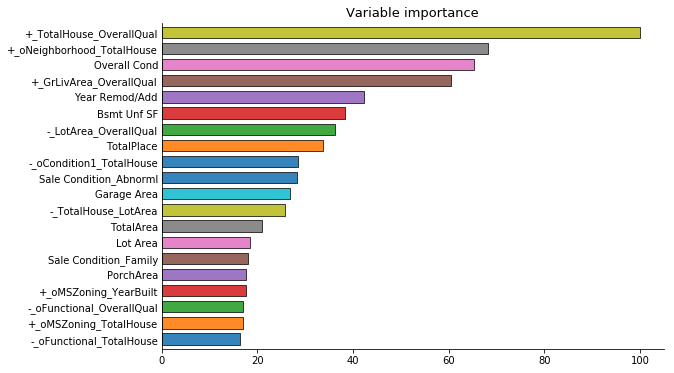

In [124]:
from statlearning import plot_feature_importance

plot_feature_importance(gbr.best_estimator_, X_train.columns)
plt.show()

In [125]:
y_pred=gb.predict(test_X)
y_pred


array([176878.03363111,  85808.70236354, 306050.41773761, ...,
       147872.44954511, 200113.69251299, 146207.45957832])

In [126]:
indexes = range(1,1383)

df_save = pd.DataFrame()
df_save['Test_ID'] = indexes
df_save['SalePrice'] = y_pred
df_save.head()

,Test_ID,SalePrice
0,1,176878.033631
1,2,85808.702364
2,3,306050.417738
3,4,88756.336991
4,5,227481.885101


In [127]:
df_save.to_csv('kaggle_submission_boosting.csv', index=False)

# Elastic Net

In [128]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from statlearning import plot_coefficients

In [129]:
enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99], cv=10)
enet.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [130]:
enet.l1_ratio_

0.99

In [131]:
enet.alpha_

0.9742053400403637

In [132]:
%%time

enet = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=10)),
))

enet.fit(X_train, y_train)

CPU times: user 56.8 s, sys: 421 ms, total: 57.2 s
Wall time: 30.3 s


In [133]:
reg = enet._final_estimator# the final estimator attribute refers to the pipeline
np.sum(reg.coef_==0.0)

367

In [134]:
enet._final_estimator.alpha_

0.0062870676921553655

In [135]:
enet._final_estimator.l1_ratio_

0.99

In [136]:
rmse=np.sqrt(mean_squared_error(np.exp(y_vali), np.exp(enet.predict(X_vali))))

rmse

23686.710112513807

In [137]:
enet.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0))])

In [138]:
y_pred=enet.predict(test_X)
y_pred

array([159989.74951249,  74899.42276508, 312750.44338593, ...,
       158125.03093077, 203840.31959439, 166510.4694082 ])

In [139]:
indexes = range(1,1383)

df_save = pd.DataFrame()
df_save['Test_ID'] = indexes
df_save['SalePrice'] = y_pred
df_save.head()

,Test_ID,SalePrice
0,1,159989.749512
1,2,74899.422765
2,3,312750.443386
3,4,81273.915405
4,5,264219.625885


In [140]:
df_save.to_csv('kaggle_submission_elasticnet.csv', index=False)

# Light GBM

In [141]:
model = lgb.LGBMRegressor(objective='regression')


tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

lgb_search = RandomizedSearchCV(
    model, tuning_parameters, 
    n_iter = 64, cv = 5, 
    return_train_score=False, n_jobs=4, 
    random_state = 20
)

In [142]:
%%time
lgb_search.fit(X_train, y_train)

CPU times: user 1.64 s, sys: 395 ms, total: 2.03 s
Wall time: 4min 19s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=True, n_iter=64, n_jobs=4,
          param_distributions={'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [250, 500, 750, 1000, 1500], 'max_depth': [2, 3, 4], 'subsample': [0.6, 0.8, 1.0]},
          pre_dispatch='2*n_jobs', random_state=20, refit=True,
          return_train_score=False, scoring=None, verbose=0)

In [143]:
lbst = lgb_search.best_estimator_
print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.8, 'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.01} 



In [144]:
lgbm = lgb.LGBMRegressor(subsample= 0.8, n_estimators= 800, max_depth=3,learning_rate= 0.01 ,objective='regression')
lgbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=3,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=800, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [145]:
rmse=np.sqrt(mean_squared_error(np.exp(y_vali), lgbm.predict(X_vali)))
rmse

197824.55640506148

In [146]:

lgbm.fit(X, y)


rmse=np.sqrt(mean_squared_error(np.exp(y_log), lgbm.predict(X)))
rmse



16063.783630380234

In [147]:
y_pred=lgbm.predict(test_X)
y_pred

array([184122.85284145,  83595.64358246, 307596.25995398, ...,
       149761.4064056 , 198841.38160047, 140962.71983765])

In [148]:
indexes = range(1,1383)

df_save = pd.DataFrame()
df_save['Test_ID'] = indexes
df_save['SalePrice'] = y_pred
df_save.head()

,Test_ID,SalePrice
0,1,184122.852841
1,2,83595.643582
2,3,307596.259954
3,4,93341.895539
4,5,239721.955079


In [149]:
df_save.to_csv('kaggle_submission_lightgbm.csv', index=False)

# Random Forest

In [150]:
model = RandomForestRegressor()

tuning_parameters = {
    'min_samples_leaf': [1,5, 10, 20, 50],
    'max_features': np.arange(1, X_train.shape[1], 5),
    'n_estimators': np.arange(150,300,10)
}

rf_search = RandomizedSearchCV(
    model, tuning_parameters, 
    cv = 5, n_iter = 16, 
    return_train_score = False, 
    n_jobs=4,
    random_state = 0
)

In [151]:
%%time
rf_search.fit(X_train, y_train)

CPU times: user 2.38 s, sys: 178 ms, total: 2.56 s
Wall time: 58.2 s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=16, n_jobs=4,
          param_distributions={'min_samples_leaf': [1, 5, 10, 20, 50], 'max_features': array([  1,   6, ..., 436, 441]), 'n_estimators': array([150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290])},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=False, scoring=None, verbose=0)

In [152]:
rf = rf_search.best_estimator_
print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'n_estimators': 180, 'min_samples_leaf': 1, 'max_features': 111} 



In [153]:
model = RandomForestRegressor(n_estimators= 180, min_samples_leaf= 1 , max_features= 111)

model.fit(X_train, y_train)

rmse=np.sqrt(mean_squared_error(np.exp(y_vali), model.predict(X_vali)))
rmse

197824.5619760887

In [154]:
model.fit(X, y)
y_pred=model.predict(test_X)
y_pred
indexes = range(1,1383)

df_save = pd.DataFrame()
df_save['Test_ID'] = indexes
df_save['SalePrice'] = y_pred
df_save.head()

,Test_ID,SalePrice
0,1,185088.827778
1,2,95991.261111
2,3,307092.916667
3,4,83651.333333
4,5,221445.061111


In [155]:
df_save.to_csv('kaggle_submission_randomforest.csv', index=False)